# Análisis Exploratorio de Juegos de Mesa (EDA)


## Introducción
En este notebook, realizaremos un análisis exploratorio de datos (EDA) del conjunto de datos de juegos de mesa extraído desde BoardGameGeek. Se llevará a cabo un análisis univariable y multivariable, con el objetivo de entender mejor las mecánicas, categorías, valoraciones y otras características de los juegos. También generaremos gráficos para visualizar las distribuciones y correlaciones entre las variables.


## Cargar Datos
Primero, cargamos el archivo CSV con los datos de los juegos de mesa extraídos. Revisamos la estructura básica del dataset y preparamos los datos para su análisis.


In [1]:
from eda_functions import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo CSV
file_path = '../data/raw/boardgames_10000_juegos.csv'
df_juegos = pd.read_csv(file_path)

# Establecer el estilo de gráficos
sns.set(style="whitegrid")

In [3]:
df_juegos

,BGGId,Name,Year_Published,Description,Min_Players,Max_Players,Min_Playtime,Max_Playtime,Average_Rating,Bayesian_Average_Rating,Number_of_Ratings,Mechanics,Categories
0,51429,L'Art de la Guerre,2008.0,From the publisher's web site:&#10;&#10;L&rsqu...,2.0,4.0,120.0,120.0,7.78723,5.54687,47,"['Action Points', 'Dice Rolling']","['Ancient', 'Book', 'Medieval', 'Miniatures', ..."
1,103219,Power League III,NaN,User Summary&#10;Power League III is the third...,1.0,2.0,NaN,NaN,0.00000,0.00000,0,[],[]
2,216316,Cooper Versus Cobbler,2004.0,An Introductory Living Greyhawk Perrenland Reg...,NaN,NaN,NaN,NaN,0.00000,0.00000,0,[],[]
3,292608,"Operation Compass: North Africa, December 1940",2019.0,"Operation Compass: North Africa, December 1940...",1.0,1.0,90.0,150.0,7.62500,0.00000,8,"['Dice Rolling', 'Grid Movement', 'Hexagon Gri...","['Wargame', 'World War II']"
4,213696,Bounties over Brotton,2005.0,A One-Round Living Greyhawk County of Urnst Re...,NaN,NaN,NaN,NaN,0.00000,0.00000,0,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,278789,No Rest for the Dead,2017.0,Publisher's blurb:&#10;&#10;Unlock The Mystery...,NaN,NaN,NaN,NaN,0.00000,0.00000,0,[],[]
9996,274662,Dead Rock Spires,2019.0,Publisher's blurb:&#10;&#10;Dead Rock Spires t...,NaN,NaN,NaN,NaN,0.00000,0.00000,0,[],[]
9997,171399,Year of the Yuppie Game,0.0,A game for 25 to 40 year olds on their way up ...,0.0,5.0,0.0,0.0,0.00000,0.00000,0,[],[]
9998,58036,Nytt ormspel,0.0,New Snake Game&#10;&#10;A roll and move game. ...,2.0,0.0,0.0,0.0,0.00000,0.00000,0,[],['Dice']


## Preparar DataFrames Binarios para Mecánicas y Categorías
Utilizamos la función `expandir_columnas_binarias` para convertir las columnas de mecánicas y categorías, que están en formato de lista, en formato binario. De esta manera, cada mecánica o categoría tendrá su propia columna con valores 0 o 1, indicando si cada juego incluye esa mecánica o categoría.


In [4]:
# Crear los DataFrames binarios para mecánicas y categorías
df_mecanicas = df_juegos[['BGGId','Mechanics']]
df_categorias = df_juegos[['BGGId','Categories']]


df_mecanicas = expandir_columnas_binarias(df_mecanicas, 'Mechanics')
df_categorias = expandir_columnas_binarias(df_categorias, 'Categories')

In [5]:
df_mecanicas

,BGGId,"""Prisoners Dilemma""",Acting,Action Drafting,Action Points,Action Queue,Action Retrieval,Action Timer,Action/Event,Advantage Token,...,Variable Phase Order,Variable Player Powers,Variable Set-up,Victory Points as a Resource,Voting,Worker Placement,Worker Placement with Dice Workers,You Choose,Zone of Control,and Pool Building
0,51429,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,103219,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,216316,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,292608,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,213696,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,278789,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,274662,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,171399,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,58036,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_categorias

,BGGId,"""Childrens Game""",Abstract Strategy,Action / Dexterity,Adventure,Age of Reason,American Civil War,American Indian Wars,American Revolutionary War,American West,...,Transportation,Travel,Trivia,Video Game Theme,Vietnam War,Wargame,Word Game,World War I,World War II,Zombies
0,51429,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,103219,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,216316,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,292608,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,213696,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,278789,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,274662,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,171399,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,58036,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Eliminar las columnas de mecánicas y categorías del df_juegos
df_juegos.drop(columns=['Mechanics', 'Categories'], inplace=True)

## Exploración de los Datos
Antes de comenzar el análisis, es importante explorar los datos para detectar posibles valores nulos, duplicados y asegurarnos de que las variables estén en el formato correcto. Aquí usamos la función `df_exploration` para hacer una revisión básica del conjunto de datos.


**`df_exploration(df)`**
   - Esta función realiza una exploración básica del DataFrame proporcionado, mostrando información clave sobre el conjunto de datos, como el tipo de datos, valores duplicados, valores nulos y los valores únicos en cada columna.

In [8]:
# Exploración de los datos
df_exploration(df_juegos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BGGId                    10000 non-null  int64  
 1   Name                     10000 non-null  object 
 2   Year_Published           7636 non-null   float64
 3   Description              9992 non-null   object 
 4   Min_Players              5876 non-null   float64
 5   Max_Players              5876 non-null   float64
 6   Min_Playtime             4104 non-null   float64
 7   Max_Playtime             4104 non-null   float64
 8   Average_Rating           10000 non-null  float64
 9   Bayesian_Average_Rating  10000 non-null  float64
 10  Number_of_Ratings        10000 non-null  int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 859.5+ KB
None

Valores duplicados: 0

Valores nulos: 
BGGId                         0
Name                          0
Year_Published   

,BGGId,Name,Year_Published,Description,Min_Players,Max_Players,Min_Playtime,Max_Playtime,Average_Rating,Bayesian_Average_Rating,Number_of_Ratings
0,51429,L'Art de la Guerre,2008.0,From the publisher's web site:&#10;&#10;L&rsqu...,2.0,4.0,120.0,120.0,7.78723,5.54687,47
1,103219,Power League III,NaN,User Summary&#10;Power League III is the third...,1.0,2.0,NaN,NaN,0.00000,0.00000,0
2,216316,Cooper Versus Cobbler,2004.0,An Introductory Living Greyhawk Perrenland Reg...,NaN,NaN,NaN,NaN,0.00000,0.00000,0
3,292608,"Operation Compass: North Africa, December 1940",2019.0,"Operation Compass: North Africa, December 1940...",1.0,1.0,90.0,150.0,7.62500,0.00000,8
4,213696,Bounties over Brotton,2005.0,A One-Round Living Greyhawk County of Urnst Re...,NaN,NaN,NaN,NaN,0.00000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,278789,No Rest for the Dead,2017.0,Publisher's blurb:&#10;&#10;Unlock The Mystery...,NaN,NaN,NaN,NaN,0.00000,0.00000,0
9996,274662,Dead Rock Spires,2019.0,Publisher's blurb:&#10;&#10;Dead Rock Spires t...,NaN,NaN,NaN,NaN,0.00000,0.00000,0
9997,171399,Year of the Yuppie Game,0.0,A game for 25 to 40 year olds on their way up ...,0.0,5.0,0.0,0.0,0.00000,0.00000,0
9998,58036,Nytt ormspel,0.0,New Snake Game&#10;&#10;A roll and move game. ...,2.0,0.0,0.0,0.0,0.00000,0.00000,0


## Limpieza de Datos
Para el análisis, eliminamos los valores nulos y convertimos los tipos de datos a sus formatos adecuados. Guardamos los datos limpios para futuros análisis.


In [9]:
# Eliminar los NaN
df_juegos_clean = df_juegos.dropna()

In [10]:
# Exploración de los datos
df_exploration(df_juegos_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4102 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BGGId                    4102 non-null   int64  
 1   Name                     4102 non-null   object 
 2   Year_Published           4102 non-null   float64
 3   Description              4102 non-null   object 
 4   Min_Players              4102 non-null   float64
 5   Max_Players              4102 non-null   float64
 6   Min_Playtime             4102 non-null   float64
 7   Max_Playtime             4102 non-null   float64
 8   Average_Rating           4102 non-null   float64
 9   Bayesian_Average_Rating  4102 non-null   float64
 10  Number_of_Ratings        4102 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 384.6+ KB
None

Valores duplicados: 0

Valores nulos: 
BGGId                      0
Name                       0
Year_Published          

,BGGId,Name,Year_Published,Description,Min_Players,Max_Players,Min_Playtime,Max_Playtime,Average_Rating,Bayesian_Average_Rating,Number_of_Ratings
0,51429,L'Art de la Guerre,2008.0,From the publisher's web site:&#10;&#10;L&rsqu...,2.0,4.0,120.0,120.0,7.78723,5.54687,47
3,292608,"Operation Compass: North Africa, December 1940",2019.0,"Operation Compass: North Africa, December 1940...",1.0,1.0,90.0,150.0,7.62500,0.00000,8
6,36608,Swiss Family Robinson,2005.0,"""Solo Board, Dice, and Card Game. You control ...",1.0,1.0,0.0,0.0,4.00000,0.00000,1
13,2537,Draco & Co,2001.0,Draco is the king of all rogues and bandits. H...,3.0,6.0,60.0,60.0,5.53557,5.49733,386
17,290066,The Queen's Collection,2019.0,"The Queen is a passionate boardgamer, but unfo...",1.0,4.0,25.0,40.0,6.01813,5.50345,32
...,...,...,...,...,...,...,...,...,...,...,...
9993,38169,Wuxia,2004.0,"""Card Game for 2+ Players. Chinese Sword & Sor...",2.0,0.0,0.0,0.0,4.00000,0.00000,1
9994,243442,Land Ahead!,2017.0,Land Ahead! is a fast-paced game in which play...,1.0,6.0,60.0,90.0,8.00000,0.00000,1
9997,171399,Year of the Yuppie Game,0.0,A game for 25 to 40 year olds on their way up ...,0.0,5.0,0.0,0.0,0.00000,0.00000,0
9998,58036,Nytt ormspel,0.0,New Snake Game&#10;&#10;A roll and move game. ...,2.0,0.0,0.0,0.0,0.00000,0.00000,0


In [11]:
# Cambiar a int las columnas Year_Published, Min_Players, Max_Players
df_juegos_clean = df_juegos_clean.astype({'Year_Published': 'int', 'Min_Players': 'int', 'Max_Players': 'int', 'Min_Playtime': 'int', 'Max_Playtime': 'int'})

In [12]:
# Pasar los df a csv
df_juegos_clean.to_csv('../data/cleaned/data_juegos.csv', index=False)
df_categorias.to_csv('../data/cleaned/data_categorias.csv', index=False)
df_mecanicas.to_csv('../data/cleaned/data_mecanicas.csv', index=False)

In [21]:
df_juegos_clean.sample(30)

,BGGId,Name,Year_Published,Description,Min_Players,Max_Players,Min_Playtime,Max_Playtime,Average_Rating,Bayesian_Average_Rating,Number_of_Ratings
8472,233818,Sheriff of Nottingham: Pig Promo Pack,2017,Originally available at Gen Con 2017&#10;&#10;...,3,5,60.0,60.0,7.17442,5.52977,43
463,5172,Blitzkrieg General,1999,Blitzkrieg General is much like an advanced ve...,1,8,120.0,720.0,6.27453,5.53304,106
5506,294672,@Camp,2019,"Card game with 23 play cards, 1 rules card and...",2,7,10.0,20.0,8.00000,0.00000,1
1572,17343,Flames of War: Desert Rats – Intelligence Hand...,2004,Subtitled 'Intelligence Handbook on British Ar...,1,2,120.0,120.0,7.00000,0.00000,7
3752,127880,Exercises Snake Game,1870,Exercises Snake Game is a gambling game. Playe...,2,6,20.0,20.0,0.00000,0.00000,0
4559,154889,Toasted or Roasted,2014,Game description from the publisher:&#10;&#10;...,2,4,0.0,0.0,5.13250,5.48997,40
2493,130472,Dusk: Rise of the Occulites II,0,Dusk - Rise of the Occulites II is the second ...,2,2,30.0,30.0,0.00000,0.00000,0
8698,15918,Sandokan,1976,Based on E.Salgari (Italian writer born in 186...,2,6,0.0,0.0,6.31201,0.00000,11
2652,158951,Skaters Only,1988,"Skaters Only&trade;, Southwest Innovations Inc...",2,6,0.0,0.0,0.00000,0.00000,0
3489,120548,Diamino poker,0,"Like a Poker Dice, but there are letters on di...",2,6,30.0,30.0,0.00000,0.00000,0


## Análisis Exploratorio de Datos (EDA)
A continuación, aplicamos diversas funciones de análisis para entender la distribución de las variables clave, como la cantidad de jugadores, tiempo de juego, valoraciones, mecánicas y categorías. Además, visualizamos la distribución de estas variables mediante gráficos.

A continuación, mostramos algunas de las funciones que utilizaremos:


1. **`analizar_variable_numerica(df, columna)`**
   - Analiza una variable numérica generando un histograma, un diagrama de caja (boxplot) y proporcionando estadísticas descriptivas. Esto permite visualizar la distribución y detectar posibles valores atípicos.

2. **`analizar_variable_categorica(df, columna)`**
   - Analiza una variable categórica, mostrando un gráfico de barras con las frecuencias de cada categoría. También imprime una tabla con la frecuencia de las diferentes categorías presentes en los datos.

3. **`analizar_variable_textual(df, columna)`**
   - Esta función se centra en analizar variables de texto. Calcula y muestra la distribución de la longitud de los textos en la columna seleccionada, junto con estadísticas descriptivas de la longitud de las descripciones.

4. **`analizar_juegos_por_año(df)`**
   - Grafica la cantidad de juegos publicados por año. Esto es útil para visualizar tendencias en la cantidad de juegos lanzados en diferentes períodos de tiempo.

5. **`analizar_mecanicas_populares(df_mecanicas)`**
   - Muestra las 10 mecánicas más populares en los juegos utilizando un gráfico de barras. Ayuda a identificar cuáles son las mecánicas más comunes en los juegos analizados.

6. **`analizar_categorias_populares(df_categorias)`**
   - Similar a la función anterior, pero se enfoca en las categorías. Muestra un gráfico de barras con las 10 categorías más populares en el conjunto de juegos.

7. **`analizar_correlaciones(df)`**
   - Calcula y visualiza la correlación entre diversas variables numéricas (valoraciones, número de jugadores, tiempo de juego, etc.). Utiliza un heatmap para mostrar gráficamente la fuerza de la relación entre las variables.

8. **`analizar_mejor_valoradas(df_juegos, df_binario, tipo)`**
    - Esta función analiza cuáles son las mecánicas o categorías mejor valoradas, calculando la media de las valoraciones de los juegos que contienen cada mecánica o categoría. Muestra un gráfico de barras con las 10 mejores valoradas.


### Análisis Univariable
Este análisis se enfoca en estudiar la distribución de cada variable individualmente. Examinaremos variables numéricas como `Year_Published`, `Min_Players`, `Max_Players` y las valoraciones, así como variables categóricas y textuales.


**Análisis de Variables Textuales**
Para las variables textuales, como `Name` y `Description`, analizamos la longitud de los textos, ya que puede ser relevante para entender la complejidad de las descripciones.

**Análisis de Variables Numéricas**
Visualizamos la distribución de las variables numéricas utilizando histogramas y boxplots.

**Análisis de Mecánicas y Categorías**
Estudiamos cuáles son las mecánicas y categorías más comunes en los juegos del dataset.

#### Análisis Name

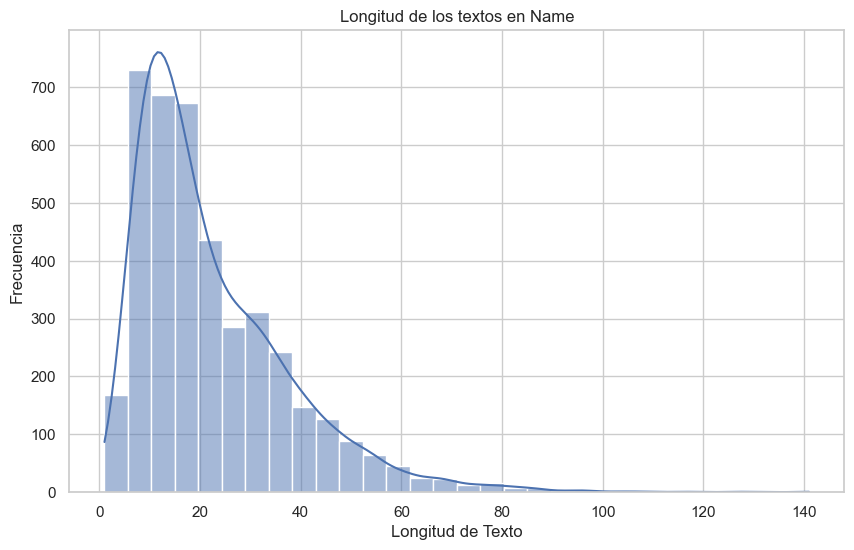

Descripción estadística de la longitud de los textos en Name:
count    4102.000000
mean       22.374451
std        15.390035
min         1.000000
25%        11.000000
50%        18.000000
75%        30.000000
max       141.000000
Name: Name_longitud, dtype: float64



In [14]:
# Distribución de la longitud de los nombres
analizar_variable_textual(df_juegos_clean, 'Name')

#### Análisis Description

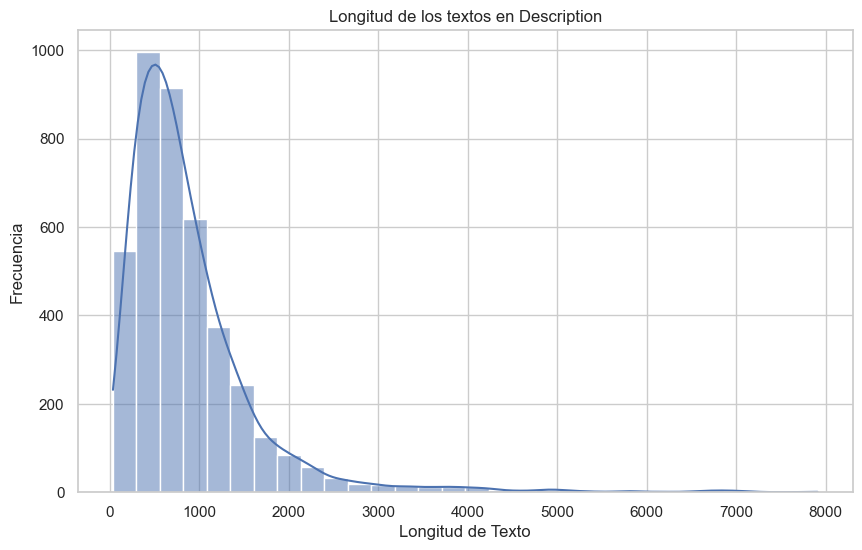

Descripción estadística de la longitud de los textos en Description:
count    4102.000000
mean      878.084349
std       750.515476
min        34.000000
25%       420.000000
50%       689.000000
75%      1084.000000
max      7907.000000
Name: Description_longitud, dtype: float64



In [15]:
# Distribución de la longitud de las descripciones
analizar_variable_textual(df_juegos_clean, 'Description')

#### Análisis Year_Published

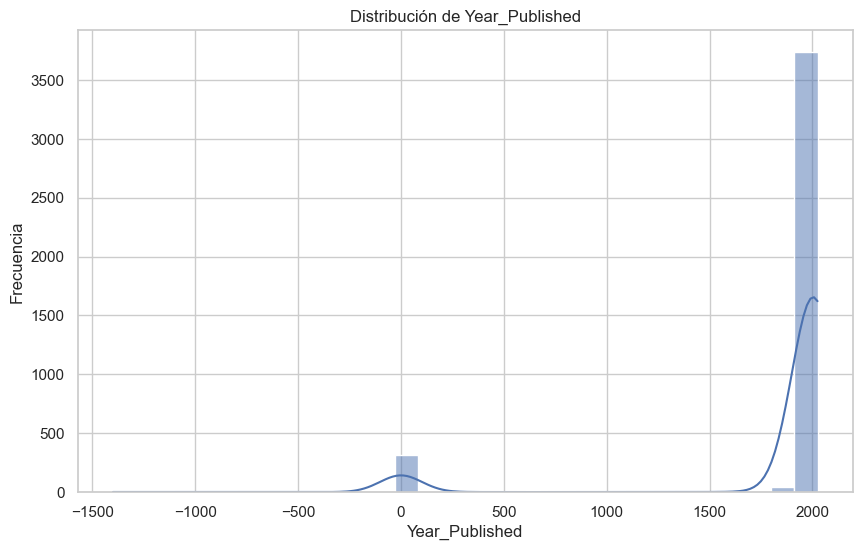

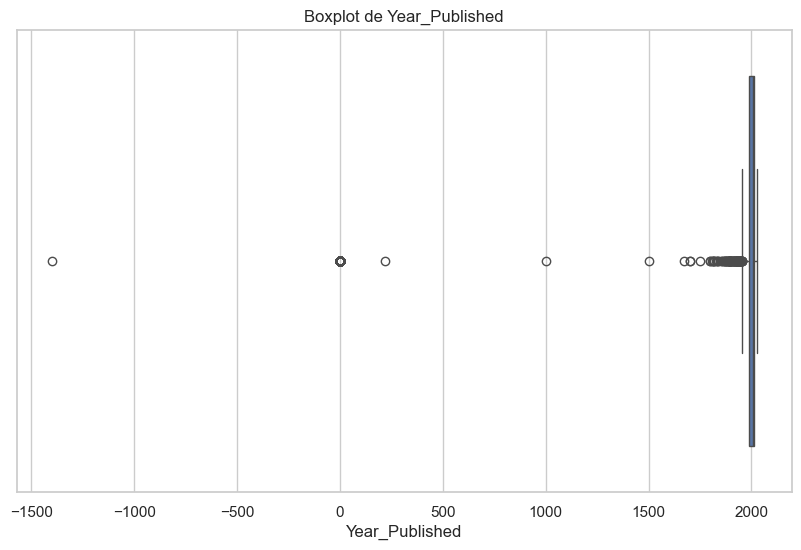

Descripción estadística de Year_Published:
count    4102.000000
mean     1845.766943
std       538.359919
min     -1400.000000
25%      1990.000000
50%      2008.000000
75%      2015.000000
max      2025.000000
Name: Year_Published, dtype: float64



In [16]:
# Distribución de los años de publicación
analizar_variable_numerica(df_juegos_clean, 'Year_Published')

Podemos observar que hay errores en los datos de año de publicación. Volvemos a analizarlo, teniendo en cuenta los datos a partir de 1900.

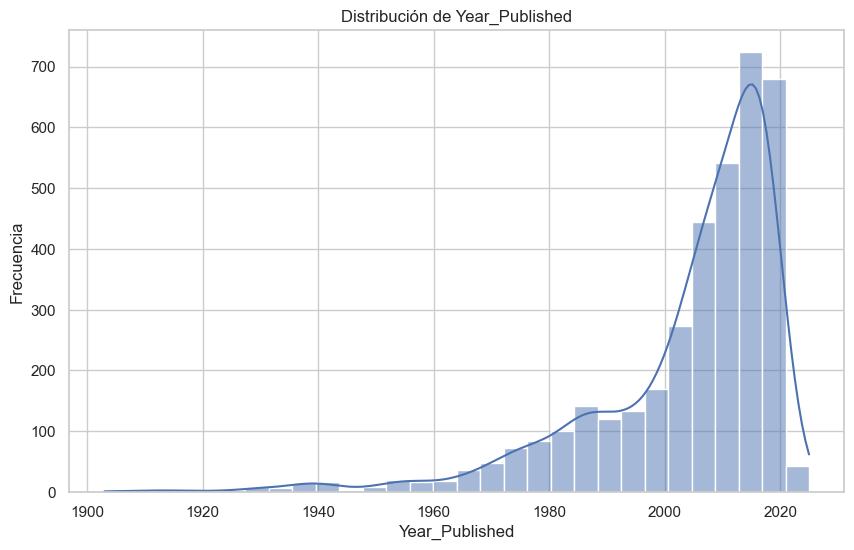

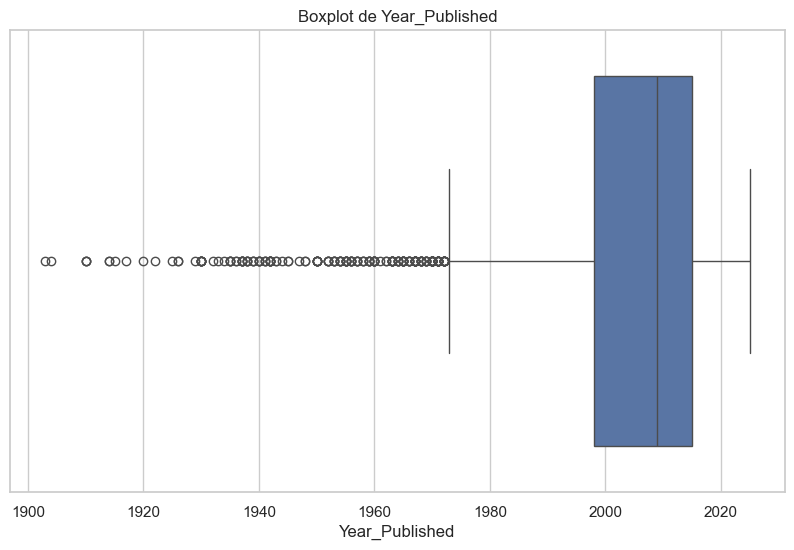

Descripción estadística de Year_Published:
count    3741.000000
mean     2003.767442
std        17.072711
min      1903.000000
25%      1998.000000
50%      2009.000000
75%      2015.000000
max      2025.000000
Name: Year_Published, dtype: float64



In [17]:
# Distribución de los años de publicación a partir de 1900
analizar_variable_numerica(df_juegos_clean[df_juegos_clean['Year_Published'] > 1900], 'Year_Published')

c:\Users\Laura Ortiz\Documents\GitHub\GameMatcher\eda\eda_functions.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Published'] = pd.to_numeric(df['Year_Published'], errors='coerce')


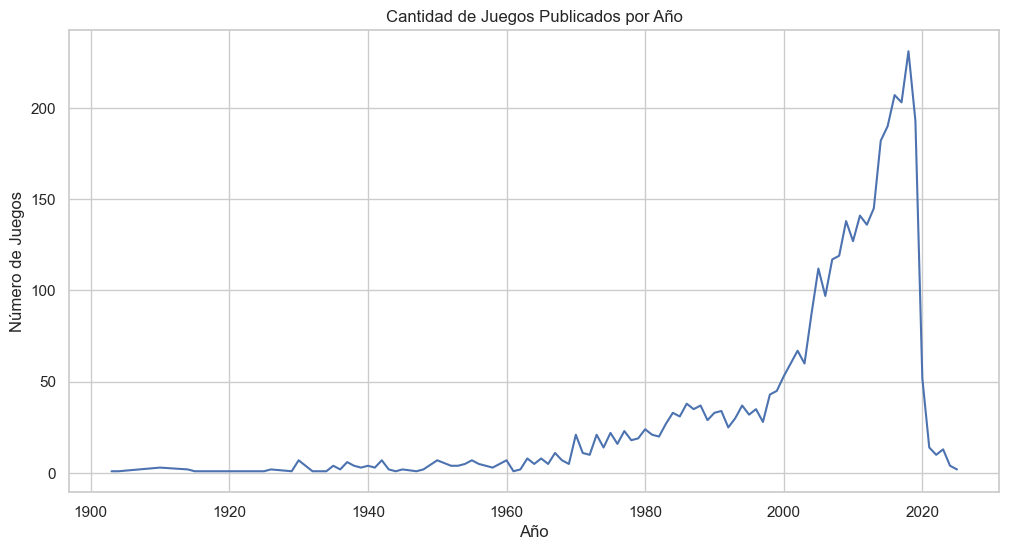

In [18]:
#Juegos publicados por año
analizar_juegos_por_año(df_juegos_clean[df_juegos_clean['Year_Published'] > 1900])

#### Análisis Min_Players

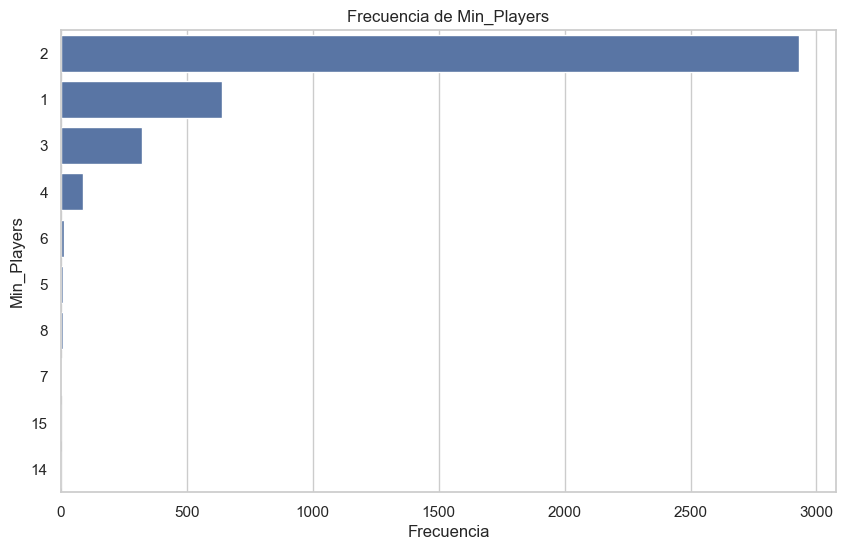

Frecuencia de Min_Players:
2     2931
1      641
3      320
4       88
6       11
5        9
8        8
7        3
15       1
14       1
Name: Min_Players, dtype: int64



In [19]:
# Distribución de los jugadores Mínimos
analizar_variable_categorica(df_juegos_clean[df_juegos_clean['Min_Players'] > 0], 'Min_Players')

#### Análisis Max_Players

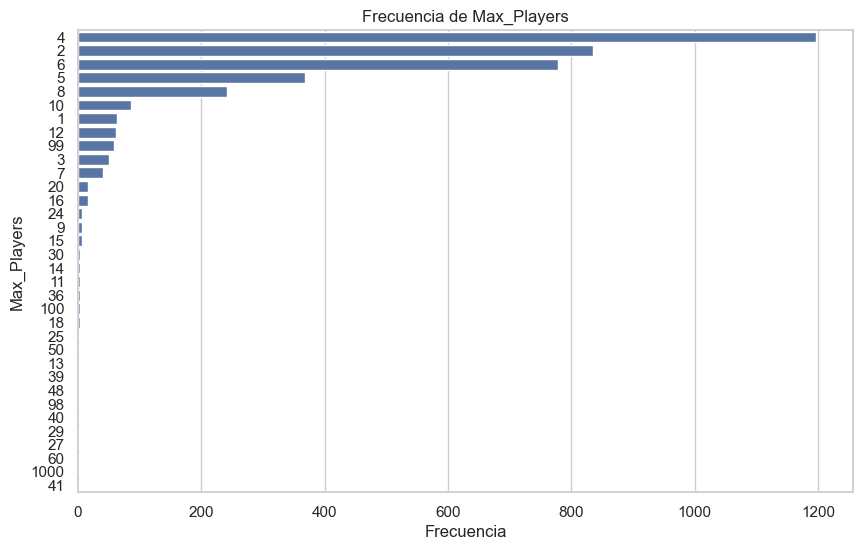

Frecuencia de Max_Players:
4       1197
2        836
6        778
5        368
8        241
10        86
1         64
12        61
99        58
3         50
7         41
20        17
16        16
24         7
9          6
15         6
30         4
14         4
11         4
36         4
100        3
18         3
25         2
50         2
13         2
39         1
48         1
98         1
40         1
29         1
27         1
60         1
1000       1
41         1
Name: Max_Players, dtype: int64



In [20]:
# Distribución de los jugadores Máximos
analizar_variable_categorica(df_juegos_clean[df_juegos_clean['Max_Players'] > 0], 'Max_Players')

#### Análisis Min_Playtime

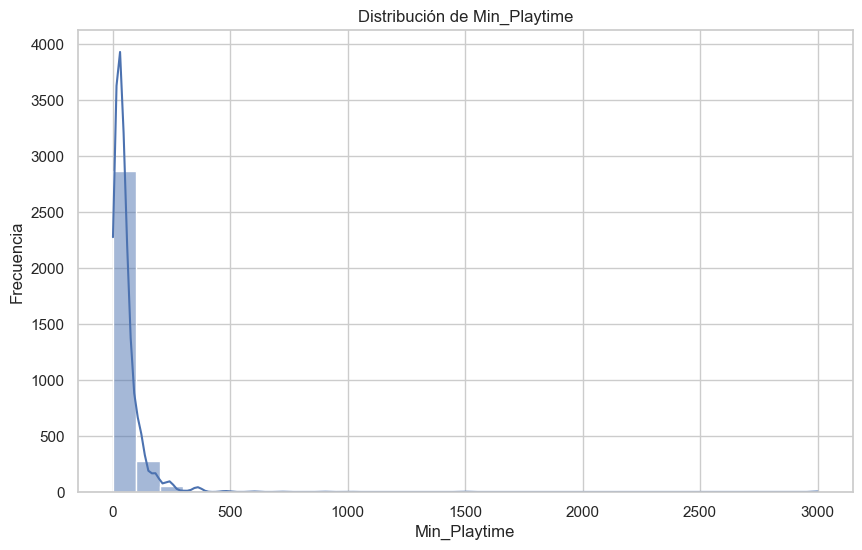

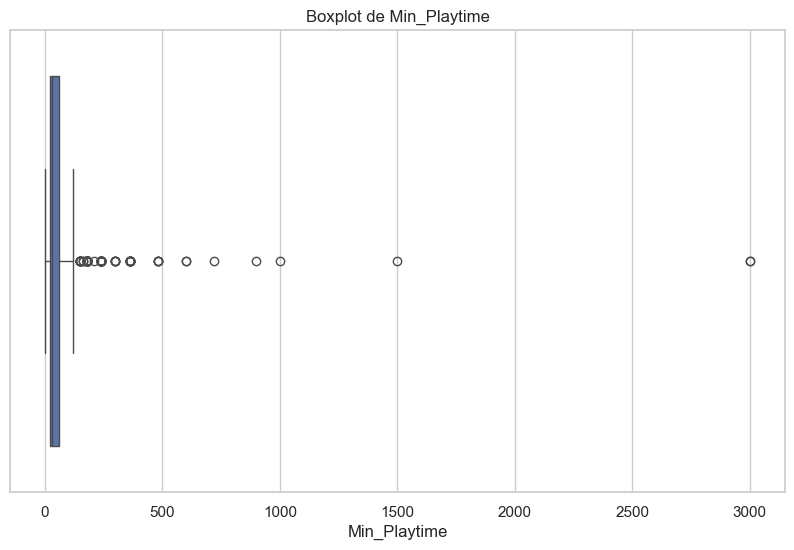

Descripción estadística de Min_Playtime:
count    3234.000000
mean       53.700371
std        98.453631
min         1.000000
25%        20.000000
50%        30.000000
75%        60.000000
max      3000.000000
Name: Min_Playtime, dtype: float64



In [21]:
# Distribución del tiempo mínimo por partida
analizar_variable_numerica(df_juegos_clean[df_juegos_clean['Min_Playtime'] > 0], 'Min_Playtime')

#### Análisis Max_Playtime

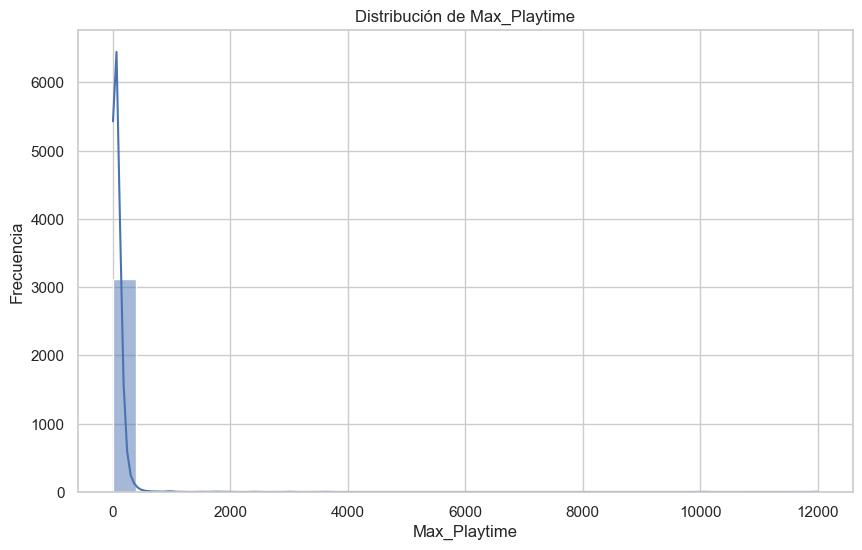

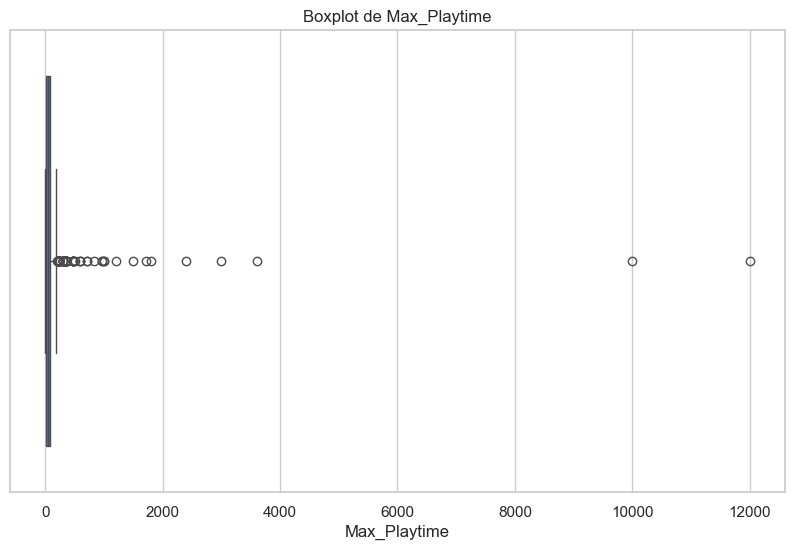

Descripción estadística de Max_Playtime:
count     3152.00000
mean        77.30552
std        305.72058
min          1.00000
25%         20.00000
50%         45.00000
75%         90.00000
max      12000.00000
Name: Max_Playtime, dtype: float64



In [22]:
# Distribución del tiempo máximo por partida
analizar_variable_numerica(df_juegos_clean[df_juegos_clean['Max_Playtime'] > 0], 'Max_Playtime')

#### Distribución de las valoraciones (Bayesian_Average_Rating y Average_Rating)

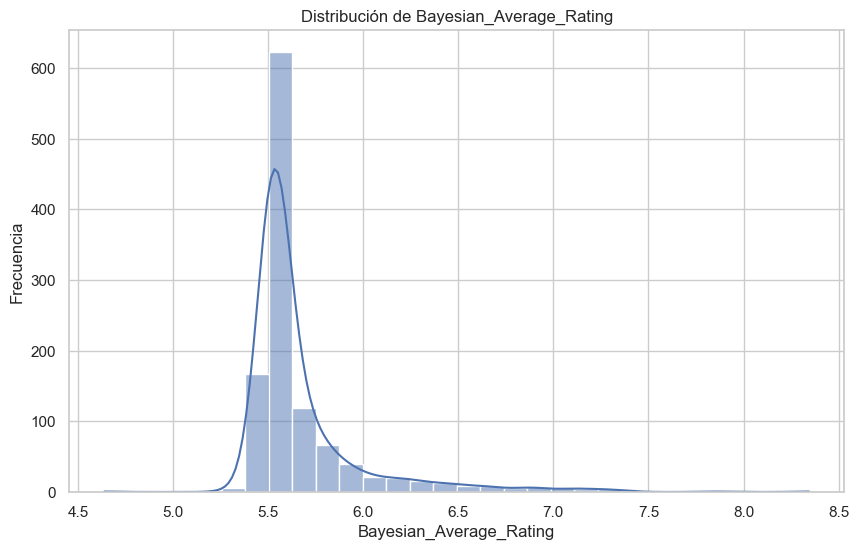

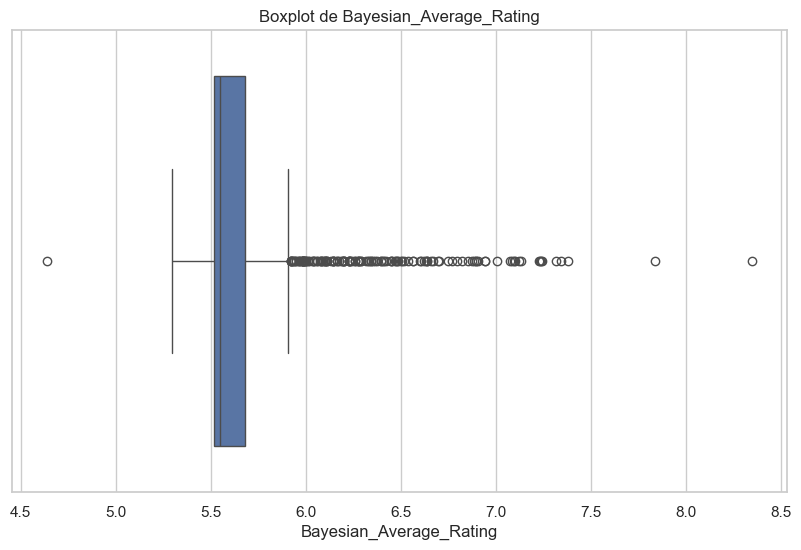

Descripción estadística de Bayesian_Average_Rating:
count    1135.000000
mean        5.672922
std         0.324391
min         4.639680
25%         5.515135
50%         5.549980
75%         5.677520
max         8.344230
Name: Bayesian_Average_Rating, dtype: float64



In [23]:
# Distribución de las valoraciones (Bayesian_Average_Rating)
analizar_variable_numerica(df_juegos_clean[df_juegos_clean['Bayesian_Average_Rating'] > 0], 'Bayesian_Average_Rating')

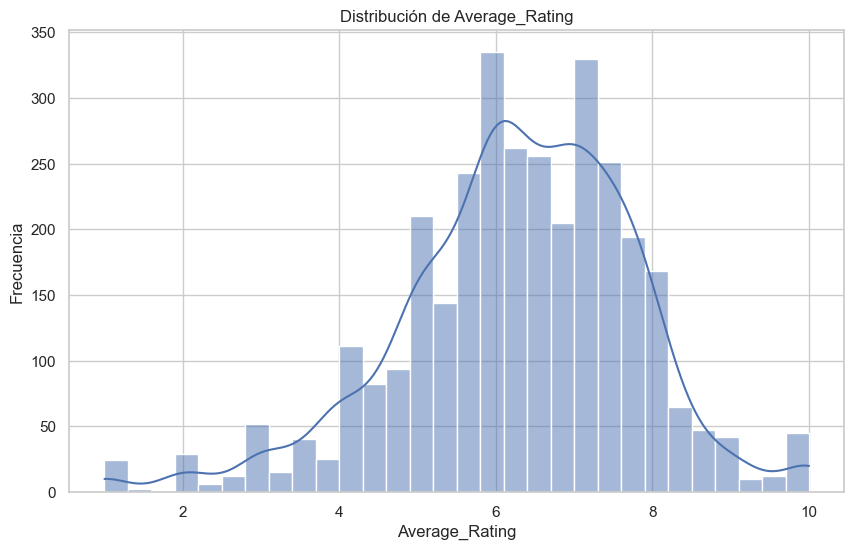

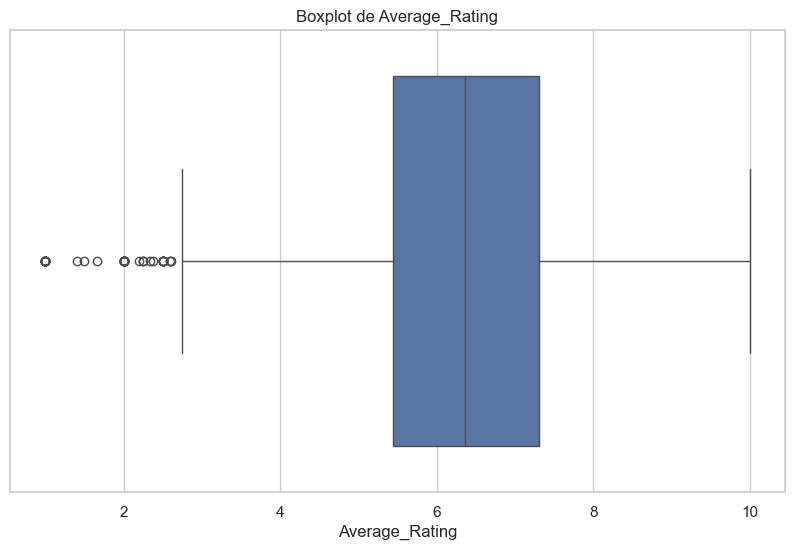

Descripción estadística de Average_Rating:
count    3312.000000
mean        6.273953
std         1.512533
min         1.000000
25%         5.440867
50%         6.363640
75%         7.303883
max        10.000000
Name: Average_Rating, dtype: float64



In [24]:
# Distribución de las valoraciones (Average_Rating)
analizar_variable_numerica(df_juegos_clean[df_juegos_clean['Average_Rating'] > 0], 'Average_Rating')

#### Analizar mecánicas y categorías populares

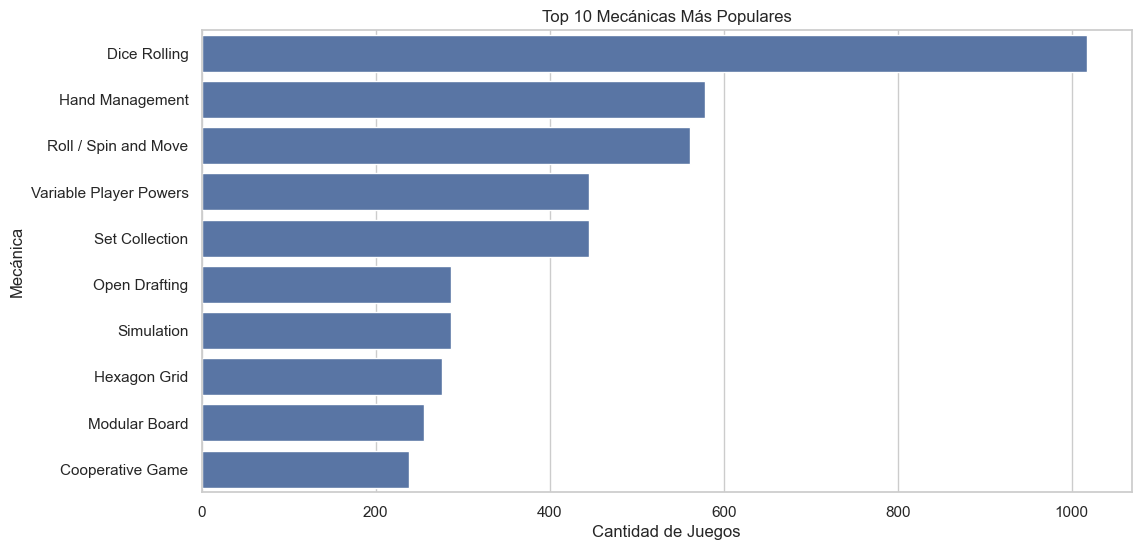

In [25]:
# Mecánicas populares
analizar_mecanicas_populares(df_mecanicas)

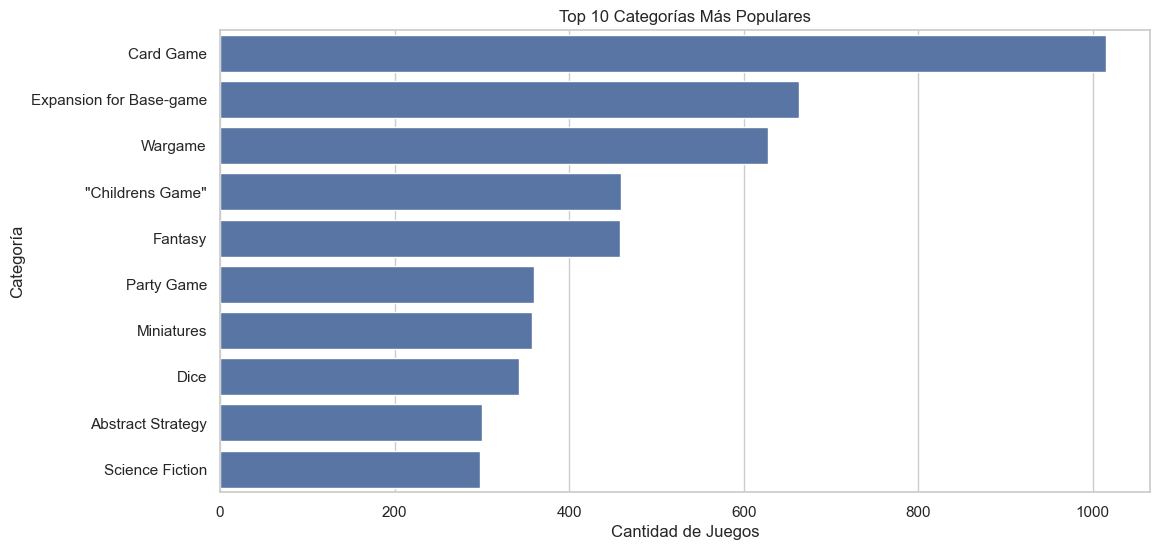

In [26]:
# Categorías populares
analizar_categorias_populares(df_categorias)

### Análisis Multivariante

En esta sección, exploramos la correlación entre diferentes variables, como las valoraciones y el número de jugadores. Utilizamos un heatmap para visualizar las correlaciones.

También analizamos las mecánicas y categorías mejor valoradas, calculando la media de las valoraciones de los juegos que incluyen cada una de ellas.


#### Analizar la correlación entre valoraciones y otras variables

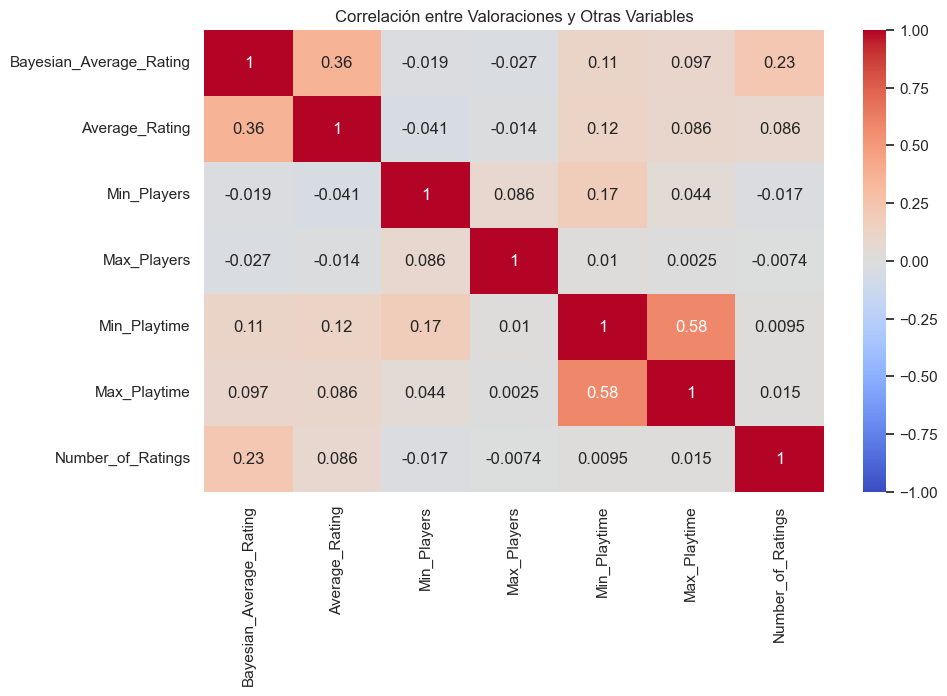

In [27]:
# Correlación entre valoraciones y otras variables
analizar_correlaciones(df_juegos_clean)

#### Analizar las mecánicas y categorías mejor valoradas

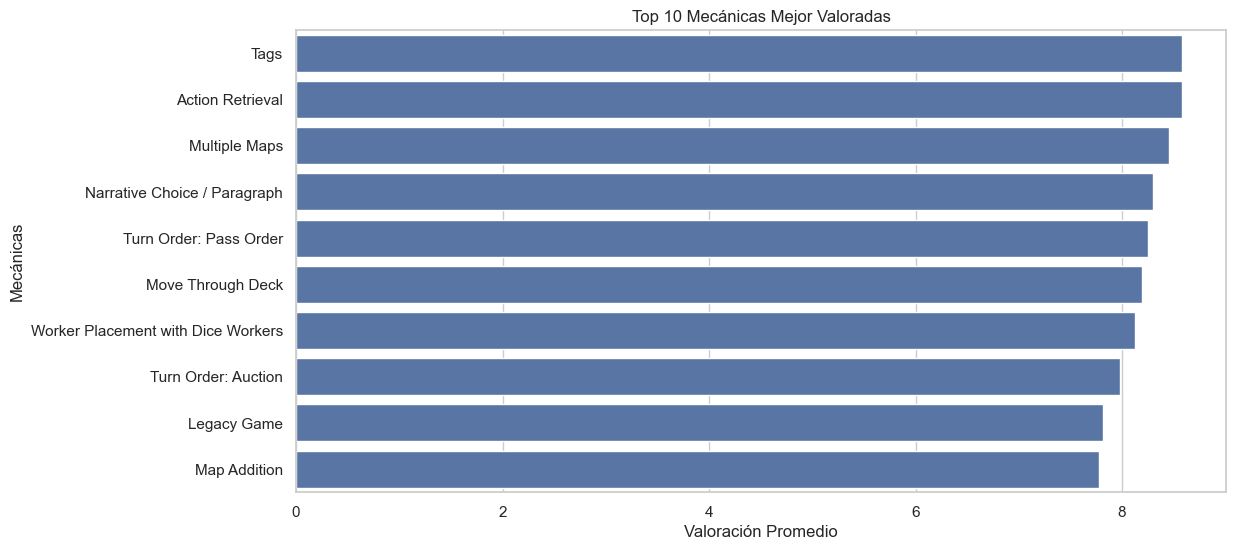

Top 10 Mecánicas Mejor Valoradas:
Tags                                  8.579910
Action Retrieval                      8.579910
Multiple Maps                         8.454550
Narrative Choice / Paragraph          8.302235
Turn Order: Pass Order                8.250000
Move Through Deck                     8.198500
Worker Placement with Dice Workers    8.129567
Turn Order: Auction                   7.985270
Legacy Game                           7.812160
Map Addition                          7.781302
dtype: float64



In [28]:
# Mecánicas mejor valoradas
analizar_mejor_valoradas(df_juegos_clean, df_mecanicas, 'mecánicas')

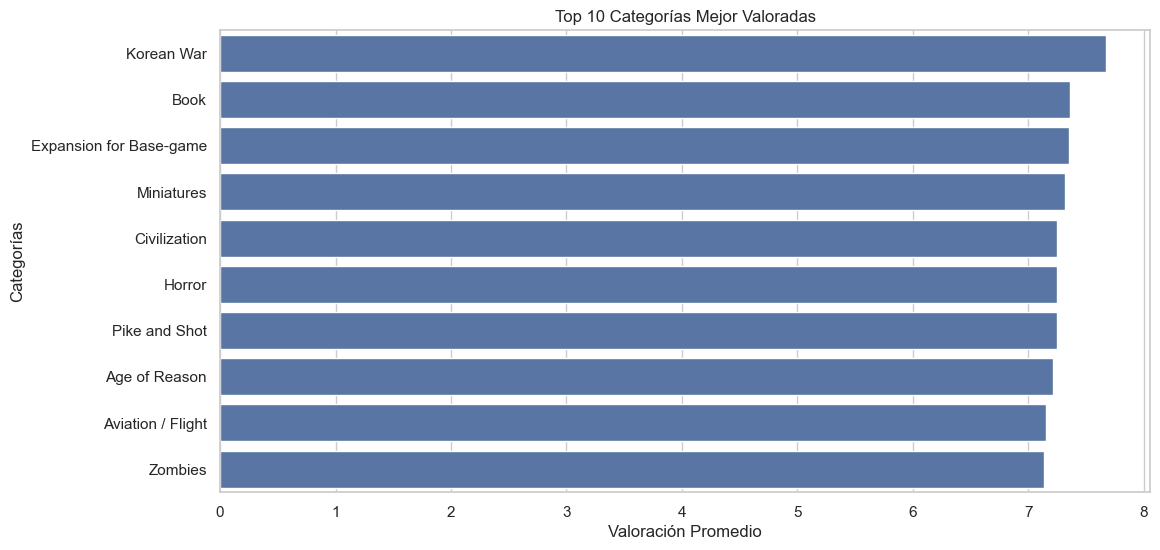

Top 10 Categorías Mejor Valoradas:
Korean War                 7.672823
Book                       7.361208
Expansion for Base-game    7.349896
Miniatures                 7.315821
Civilization               7.253561
Horror                     7.251359
Pike and Shot              7.251287
Age of Reason              7.213716
Aviation / Flight          7.158374
Zombies                    7.137124
dtype: float64



In [29]:
# Categorias mejor valoradas
analizar_mejor_valoradas(df_juegos_clean, df_categorias, 'categorías')